# MEI Demo

In [6]:
import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USERNAME']
dj.config['database.password'] = os.environ['DJ_PASSWORD']
dj.config['enable_python_native_blobs'] = True
dj.config['display.limit'] = 10

name = 'vei'
os.environ["DJ_SCHEMA_NAME"] = f"metrics_{name}"
dj.config["nnfabrik.schema_name"] = os.environ["DJ_SCHEMA_NAME"]

In [3]:
import os
import wandb

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = 'w'
mpl.rcParams["axes.facecolor"] = 'w'
mpl.rcParams["savefig.facecolor"] = 'w'
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["figure.figsize"] = (3, 3)
import seaborn as sns
from torch import load

from nnfabrik.main import *
from mei.main import MEISeed, MEIMethod
from nnfabrik.main import Dataset, my_nnfabrik
from nnsysident.tables.experiments import TrainedModel, schema
from nnsysident.tables.mei import MEISelector, TrainedEnsembleModel, MEI

device = "cuda"
random_seed = 42

Connecting konstantin@134.76.19.44:3306


In [7]:
TrainedModel().proj("train_loss", "validation_loss", "test_loss", "train_correlation", "validation_correlation", "test_correlation")

model_fn name of the model function,model_hash hash of the model configuration,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,seed Random seed that is passed to the model- and dataset-builder,train_loss train_loss,validation_loss validation_loss,test_loss test_loss,train_correlation train_correlation,validation_correlation validation_correlation,test_correlation test_correlation
nnsysident.models.models.stacked2d_gamma,ea7c8ee30c9f5ab0a632392c3a4b32c0,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,1,-8.24757,-8.23515,-8.11988,0.361374,0.284476,0.281355
nnsysident.models.models.stacked2d_gamma,ea7c8ee30c9f5ab0a632392c3a4b32c0,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,2,-8.23626,-8.23384,-8.11951,0.318967,0.270849,0.265752
nnsysident.models.models.stacked2d_gamma,ea7c8ee30c9f5ab0a632392c3a4b32c0,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,3,-8.23092,-8.22978,-8.11395,0.288773,0.238755,0.23075
nnsysident.models.models.stacked2d_gamma,ea7c8ee30c9f5ab0a632392c3a4b32c0,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,4,-8.23998,-8.23393,-8.12057,0.330428,0.269772,0.271729
nnsysident.models.models.stacked2d_gamma,ea7c8ee30c9f5ab0a632392c3a4b32c0,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,5,-8.23829,-8.23001,-8.11642,0.325423,0.25759,0.260295
nnsysident.models.models.stacked2d_poisson,eeea99f6abe39ec1226d71c55be03556,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,1,0.738979,0.777655,0.79982,0.37732,0.280472,0.276838
nnsysident.models.models.stacked2d_poisson,eeea99f6abe39ec1226d71c55be03556,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,2,0.74441,0.779859,0.802576,0.366363,0.277219,0.268745
nnsysident.models.models.stacked2d_poisson,eeea99f6abe39ec1226d71c55be03556,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,3,0.739539,0.774678,0.794174,0.374553,0.284924,0.283809
nnsysident.models.models.stacked2d_poisson,eeea99f6abe39ec1226d71c55be03556,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,4,0.748329,0.776666,0.800898,0.35674,0.280055,0.270967
nnsysident.models.models.stacked2d_poisson,eeea99f6abe39ec1226d71c55be03556,nnsysident.datasets.mouse_loaders.static_loaders,77fecfed4eaa33736d47244f2c14b36b,nnsysident.training.trainers.standard_trainer,69601593d387758e9ff6a5bf26dd6739,5,0.734421,0.778903,0.796357,0.386592,0.276405,0.282391


In [10]:
(TrainedModel() & "model_fn like '%gamma%'").fetch("test_correlation").mean()

0.2619762

In [11]:
(TrainedModel() & "model_fn like '%poisson%'").fetch("test_correlation").mean()

0.27654999999999996

In [6]:
(Model() & "model_hash = 'ea7c8ee30c9f5ab0a632392c3a4b32c0'").fetch(as_dict=True)

[{'model_fn': 'nnsysident.models.models.stacked2d_gamma',
  'model_hash': 'ea7c8ee30c9f5ab0a632392c3a4b32c0',
  'model_config': {'init_sigma': 0.4,
   'init_mu_range': 0.55,
   'gamma_input': 1.0,
   'grid_mean_predictor': {'type': 'cortex',
    'input_dimensions': 2,
    'hidden_layers': 0,
    'hidden_features': 0,
    'final_tanh': False},
   'readout_type': 'MultipleGeneralizedFullGaussian2d',
   'feature_reg_weight': 0.26702978129164495,
   'hidden_channels': 128,
   'layers': 5,
   'hidden_kern': 11,
   'input_kern': 15},
  'model_fabrikant': 'kklurz',
  'model_comment': 'Best GammaModel from Hypersearch with EarlyStopping: get_correlations',
  'model_ts': datetime.datetime(2023, 4, 19, 11, 23, 48)}]

## 3. Create Ensemble Model

In [ ]:
key = dict(dataset_fn="nnsysident.datasets.mouse_loaders.static_loaders",
           dataset_hash="77fecfed4eaa33736d47244f2c14b36b",
           model_fn="nnsysident.models.models.stacked2d_gamma",
           # model_hash="eeea99f6abe39ec1226d71c55be03556",
           trainer_hash="69601593d387758e9ff6a5bf26dd6739")

# TrainedEnsembleModel().create_ensemble(key, comment="gamma models")
TrainedEnsembleModel()

In [ ]:
# TrainedModel & "model_fn like '%poisson%'" & "comment like '%EarlyStopping: get_correlations%'"

## 4. Populate Selector Table

In [ ]:
MEISelector.populate()
MEISelector()

## 5. Specify MEI Method Parameters

In [ ]:
MEIMethod().delete()

In [ ]:
method_fn = "mei.methods.gradient_ascent"

# MEI
# method_config = {'initial': {'path': 'mei.initial.RandomNormal'},
#                  'optimizer': {'path': 'torch.optim.SGD', 'kwargs': {'lr': 0.2}},
#                  'precondition': {'path': 'mei.legacy.ops.GaussianBlur',
#                   'kwargs': {'sigma': 1}},
#                  'postprocessing': {'path': 'mei.legacy.ops.ChangeNorm',
#                   'kwargs': {'norm': 10}},
#                  'stopper': {'path': 'mei.stoppers.EarlyStopping',
#                   'kwargs': {'patience': 20, "min_iter": 200}},
#                  'objectives': [{'path': 'mei.objectives.EvaluationObjective',
#                    'kwargs': {'interval': 10}}],
#                  'device': 'cuda',
#                  'mei_class_name': 'MEI'}
# method_comment = "MEI"

# CEI
# method_config = {'initial': {'path': 'mei.initial.RandomNormal'},
#                  'optimizer': {'path': 'torch.optim.SGD', 'kwargs': {'lr': 20.}},
#                  'precondition': {'path': 'mei.legacy.ops.GaussianBlur',
#                   'kwargs': {'sigma': 1}},
#                  'postprocessing': {'path': 'mei.legacy.ops.ChangeNorm',
#                   'kwargs': {'norm': 10}},
#                  'stopper': {'path': 'mei.stoppers.EarlyStopping',
#                   'kwargs': {'patience': 20, "min_iter": 200}},
#                  'objectives': [{'path': 'mei.objectives.EvaluationObjective',
#                    'kwargs': {'interval': 10}}],
#                  'device': 'cuda',
#                  'mei_class_name': 'CEI',
#                  'ref_level': 0.8,
#                  }
# method_comment = "CEI, 0.8"

# VEI
# method_config = {'initial': {'path': 'mei.initial.ImageLoader', 'kwargs': {"mei_type": "CEI", "ref_level": 0.8}},
#                  'optimizer': {'path': 'torch.optim.SGD', 'kwargs': {'lr': 0.05}},
#                  'precondition': {'path': 'mei.legacy.ops.GaussianBlur',
#                   'kwargs': {'sigma': 1}},
#                  'postprocessing': {'path': 'mei.legacy.ops.ChangeNorm',
#                   'kwargs': {'norm': 10}},
#                  'stopper': {'path': 'mei.stoppers.EarlyStopping',
#                   'kwargs': {'patience': 20, "min_iter": 200}},
#                  'objectives': [{'path': 'mei.objectives.EvaluationObjective',
#                    'kwargs': {'interval': 10}}],
#                  'device': 'cuda',
#                  'mei_class_name': 'VEI',
#                  'ref_level': 0.8,
#                  "variance_optimization": "min",
#                  "scale": 100,
#                  "dx": 0.02,
#                  }
# method_comment = "VEI-, 0.8, 0.02"

# MEIMethod().add_method(method_fn, method_config, comment=method_comment)
MEIMethod()

In [ ]:
(MEIMethod & "method_comment like '%VEI%'")#.delete()

## 6. Trainer

In [ ]:
trainer_fn = 'nnsysident.training.trainers.standard_trainer'
trainer_config = {'detach_core': False,
                  'stop_function': 'get_loss',
                  'maximize': False}
trainer_comment = "Loss: ZIGLoss, EarlyStopping: get_loss"

# Trainer().add_entry(trainer_fn, trainer_config, trainer_comment=trainer_comment, trainer_fabrikant="kklurz")

In [ ]:
Trainer().fetch(as_dict=True)[0]

## 7. Generate MEIs

In [ ]:
# config = {}
# run = wandb.init(project='prior_optimization', config=config)

In [ ]:
from nnsysident.datasets.mouse_loaders import static_loaders
from nnsysident.utility.measures import get_oracles

dataset_config = Dataset().fetch1("dataset_config")
dataset_config["return_test_sampler"] = True
dataset_config["tier"] = "test"

dataloaders = static_loaders(**dataset_config)
oracles = get_oracles(dataloaders["test"])

idx = np.argsort(oracles)
percentile = int(0.1*len(idx))
selected_idx = idx[-percentile:]
unit_ids = (MEISelector() & "unit_index in {}".format(tuple(selected_idx))).fetch("unit_id")[:10]

ensemble_hash = (TrainedEnsembleModel() & "ensemble_comment = 'gamma models'").fetch1("ensemble_hash")

In [ ]:
n_units = len(unit_ids)

method_hash = (MEIMethod() & "method_comment like '%MEI%'").fetch1("method_hash")
MEI().populate(# "unit_id = {}".format(unit_ids[0]), 
               "unit_id in {}".format(tuple(unit_ids[:n_units])),
               "method_hash = '{}'".format(method_hash),
               "ensemble_hash = '{}'".format(ensemble_hash),
               display_progress=True,
               )

In [ ]:
entry = (MEI() * 
         MEIMethod & 
         "unit_id = {}".format(unit_ids[0]) & 
         "ensemble_hash = '{}'".format(ensemble_hash)  &
         "method_comment like '%MEI%'")
entry

In [ ]:
table = (entry & "method_hash = 'ed0524fde4a328cf6c879a7de0a9f110'")
table

In [ ]:
def potential_well(x, dx, ref_level, a):    
    out = np.exp(-a*(x+dx-ref_level)) + np.exp(a*(x-dx-ref_level))
    return out

dx = .01
ref_level = 0.8
a = 100

x = np.linspace(ref_level-10*dx, ref_level+10*dx, 5000)
y = potential_well(x, dx, ref_level, a)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.plot(x, y)
# ax.plot(x, [0.05]*len(x), color="red", ls="--")
ax.set(ylim=(-0.01, 10), xlim=(x.min(), x.max()));

## 8. Look at MEIs

In [ ]:
fig, axes = plt.subplots(3, len(unit_ids), figsize=(len(unit_ids)*2, 4))
fontsize = 16


method_comments, method_hashs = MEIMethod.fetch("method_comment", "method_hash")
for i, (method_comment, method_hash) in enumerate(zip(method_comments, method_hashs)):
    for j, unit_id in enumerate(unit_ids):
        mei_path, mean, variance = (MEI() * MEIMethod & dict(ensemble_hash=ensemble_hash, unit_id=unit_id) & f"method_hash = '{method_hash}'").fetch1("mei", "mean", "variance")
        mei = load(mei_path)
        axes[i, j].imshow(mei.squeeze(), cmap="gray")
        axes[i, j].set_yticklabels([])
        axes[i, j].set_xticklabels([])
        axes[i, j].tick_params(bottom=False, left=False)
        axes[i, j].text(0, -1.5, f'mean = {mean:.2f}, var = {variance:.0f}')
        os.remove(mei_path)
        
        if j == 0:
            axes[i, j].set_ylabel(method_comment.replace(", max variance", " +").replace(", min variance", " -"), fontsize=fontsize);
fig.tight_layout()

In [ ]:
for i, unit_id in enumerate(np.unique(MEI().fetch("unit_id"))):
    ensemble_hashs, ensemble_comments = TrainedEnsembleModel().fetch("ensemble_hash", "ensemble_comment")
    fig, axes = plt.subplots(1, 2, figsize=(4,2))
    for j, (ensemble_hash, ensemble_comment) in enumerate(zip(ensemble_hashs, ensemble_comments)):
        mei_path = (MEI() * MEIMethod & dict(ensemble_hash=ensemble_hash, unit_id=unit_id) & "method_comment = 'MEI'").fetch1("mei")
        mei = load(mei_path)
        axes[j].imshow(mei.squeeze(), cmap="gray")
        axes[j].axis("off")
        os.remove(mei_path)
        
        if i == 0:
            axes[j].set(title=ensemble_comment);

## 9. Plot Evaluations Across Time

In [ ]:
vei_method_hash = (MEIMethod() & "method_comment like '%VEI+%'").fetch1("method_hash")
table = (MEI() & dict(ensemble_hash=ensemble_hash, unit_id=unit_ids[3], method_hash=vei_method_hash))

In [ ]:
mei_path, output_path = table.fetch1("mei", "output")
output = load(output_path)
mei = load(mei_path)
os.remove(output_path)
os.remove(mei_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=100)
axes[0].plot(
    output["mei.objectives.EvaluationObjective"]["times"],
    output["mei.objectives.EvaluationObjective"]["values"],
)
axes[1].imshow(mei.squeeze(), cmap="gray")
axes[1].axis("off")

axes[0].set_xlabel("# iteration")
axes[0].set_ylabel("evaluation")
sns.despine(trim=True)

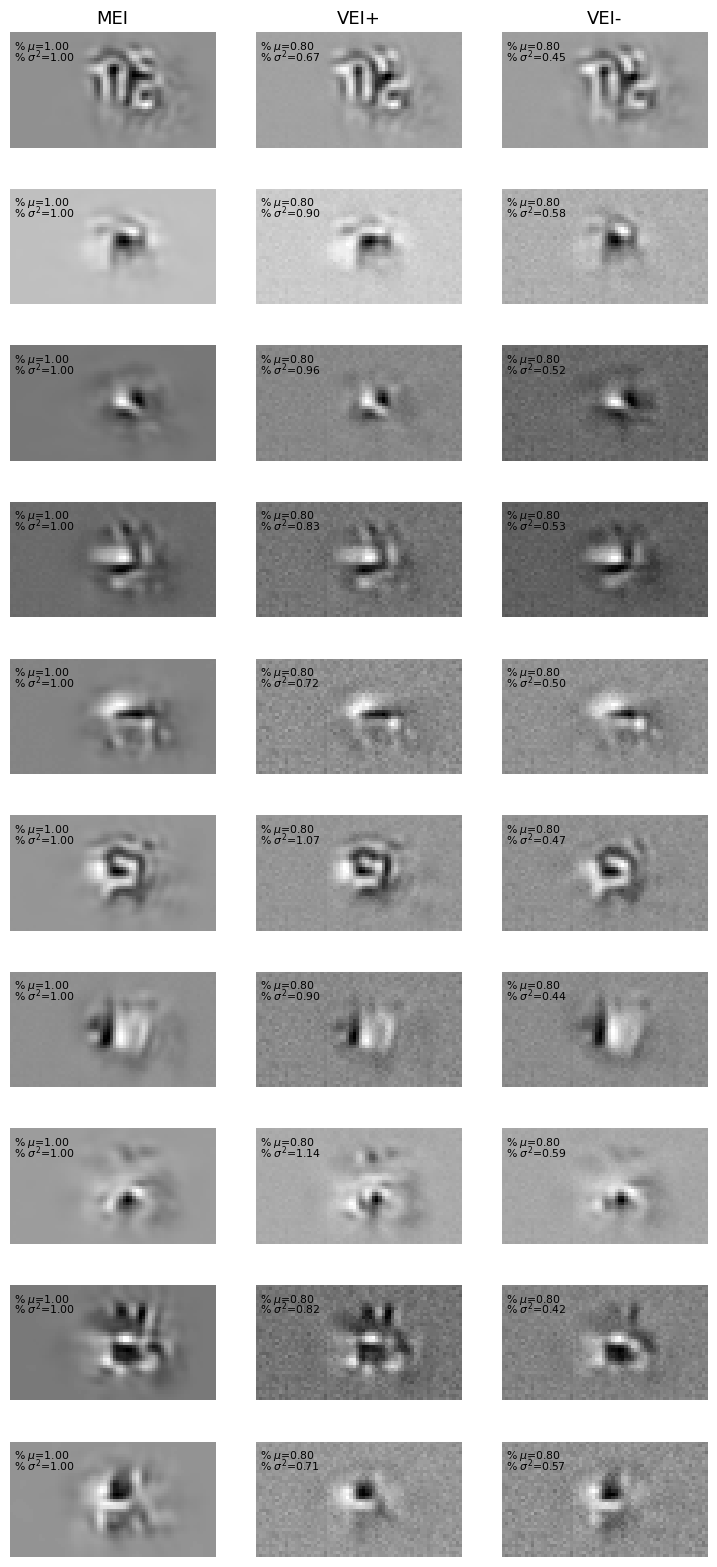

In [6]:
finished_unit_ids = np.unique((MEI() * MEIMethod & "method_comment like '%VEI%'").fetch("unit_id"))
model_types = ["MEI", "VEI+", "VEI-"] #"CEI",
# finished_unit_ids = finished_unit_ids[:2]

fig, axes = plt.subplots(len(finished_unit_ids), len(model_types), figsize=(3*len(model_types), 2*len(finished_unit_ids)), dpi=100)
fontsize = 13

for i in range(len(finished_unit_ids)):
    for j, mei_type in enumerate(model_types):
        table = (MEI() * MEIMethod & f"method_comment like '%{mei_type}%'" & f"unit_id = {finished_unit_ids[i]}")
        mei_path, mean, variance = table.fetch1("mei", "mean", "variance")
        if mei_type == "MEI":
            mei_mean = mean
            mei_variance = variance
        mei = load(mei_path)
        os.remove(mei_path)
        axes[i, j].imshow(mei.squeeze(), cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].text(0.02,
                        .85,
                        r"% $\mu$={:.2f}".format(mean/mei_mean),
                        horizontalalignment='left', 
                        transform=axes[i, j].transAxes,
                        fontsize=fontsize*.6)
        axes[i, j].text(0.02,
                        .75,
                        r"% $\sigma^2$={:.2f}".format(variance/mei_variance),
                        horizontalalignment='left', 
                        transform=axes[i, j].transAxes,
                        fontsize=fontsize*.6)
        if i == 0:
            axes[i, j].set_title(mei_type, fontsize=fontsize)
# fig.savefig("veis" + ".png", bbox_inches="tight", transparent=False)